In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


In [2]:
data = pd.read_csv("./data/raw.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

In [5]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
# check if null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.drop_duplicates(inplace = True)
data.drop(columns = ['nameOrig', 'nameDest', 'isFlaggedFraud'], inplace = True)

In [11]:
data.shape

(6362620, 8)

In [12]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [14]:
categorical_features = data.select_dtypes(include ='object' ).columns
numeric_features = data.select_dtypes(exclude ='object' ).columns

In [15]:
for col in categorical_features:
    print(col,':', data[col].unique())

    print("-----------------------------------------------------")

type : ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
-----------------------------------------------------


# Data visualization

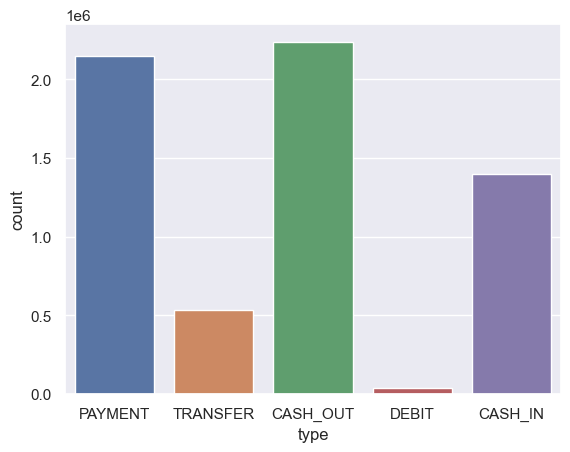

In [16]:
plt.tight_layout()
plt.style.use('fivethirtyeight')
sns.set(rc = {"figure.figsize":(16, 3)})
for col in range(len(categorical_features)):

    plt.subplot(1, 1, col+1)
    sns.countplot(x = data[categorical_features[col]])


In [17]:
numeric_features

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

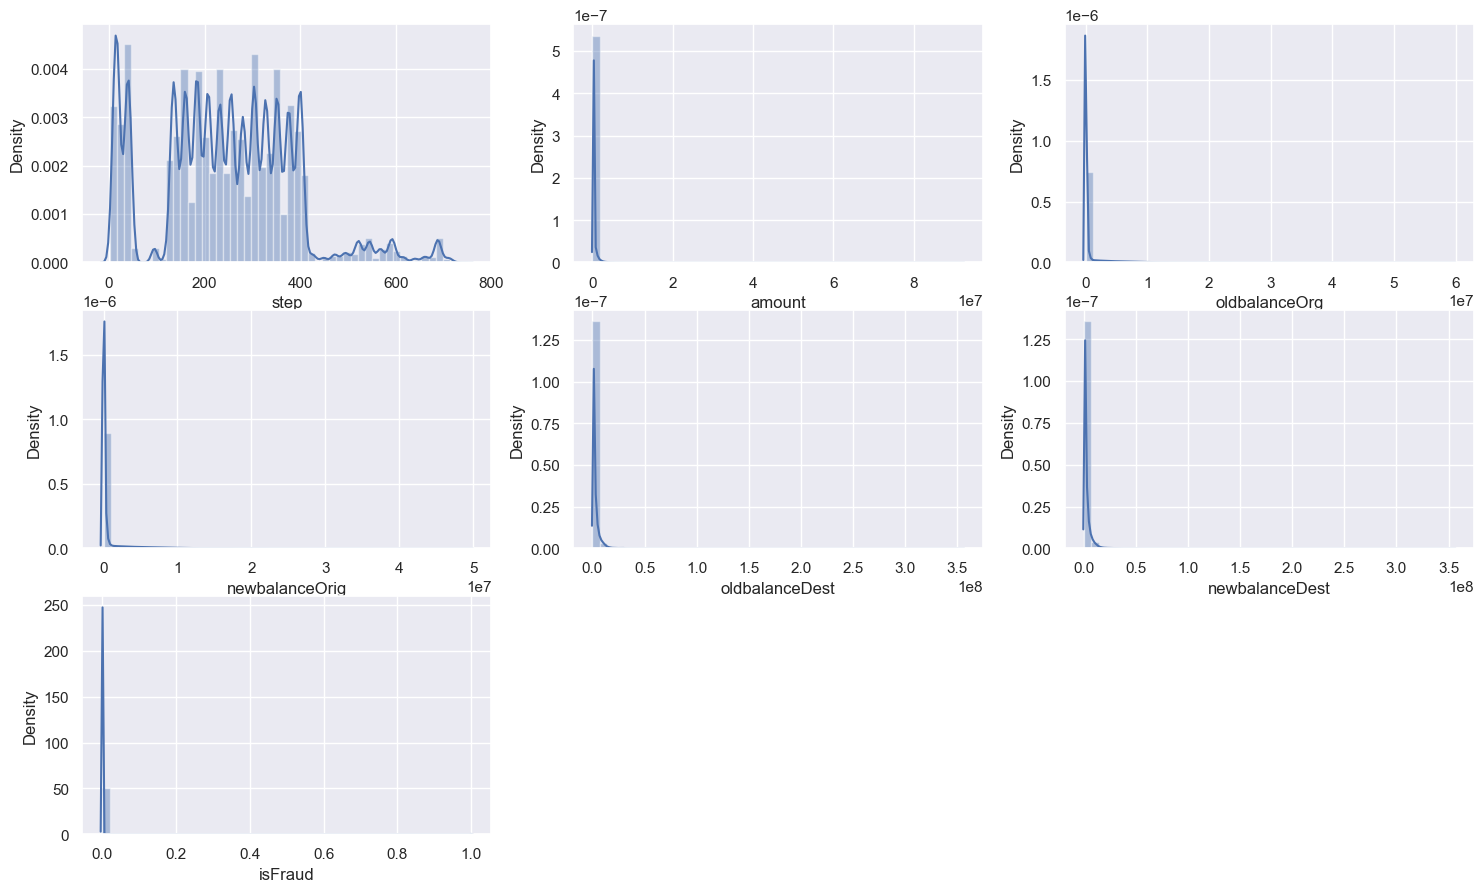

In [18]:
sns.set(rc = {"figure.figsize":(16, 10)})
for col in range(len(numeric_features)):
    plt.subplot(3, 3, col+1)
    sns.distplot(data[numeric_features[col]])

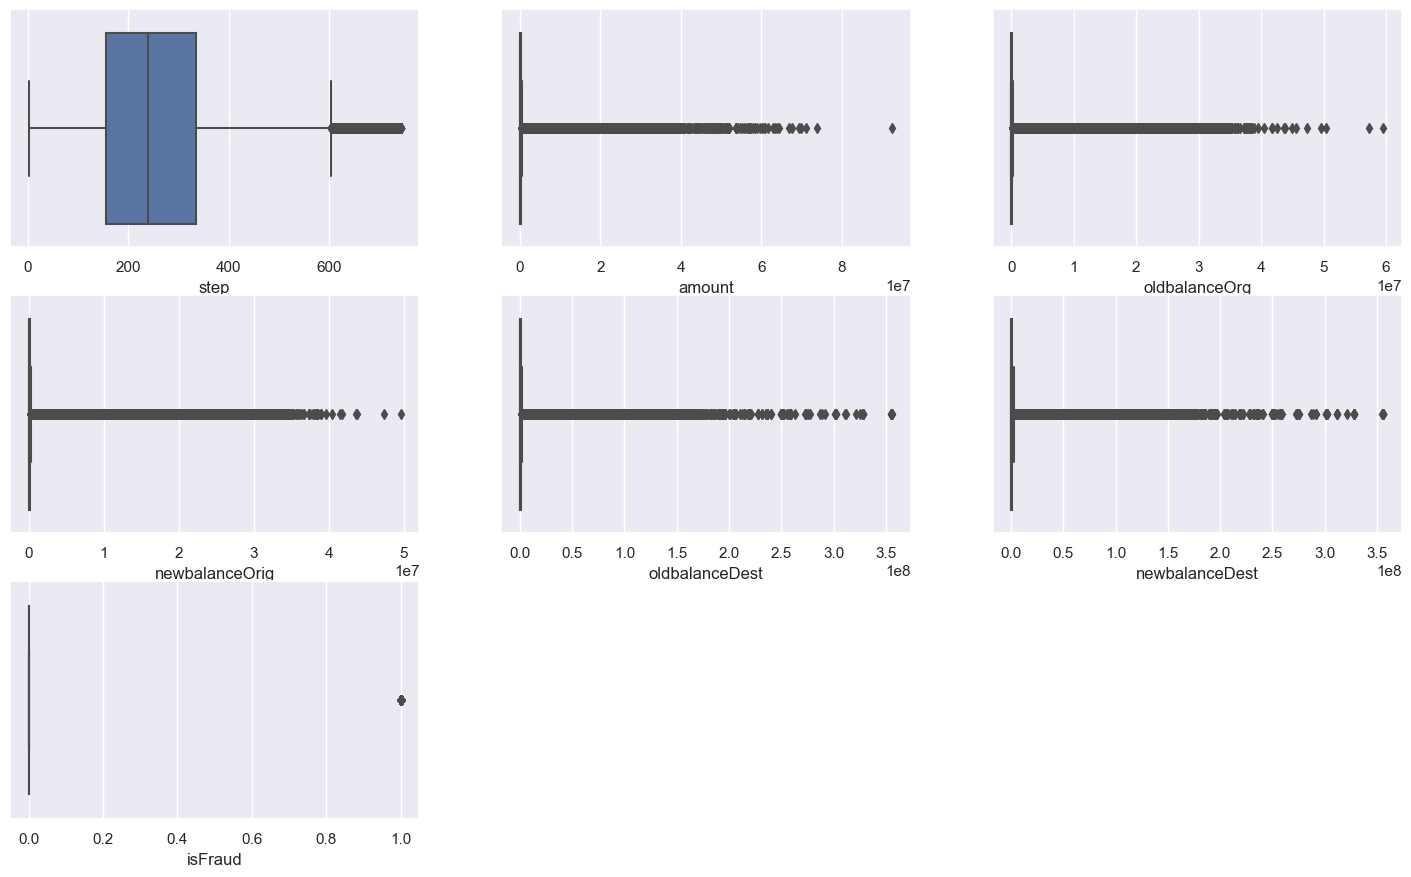

In [19]:
# See outliers with box plot
for col in range(len(numeric_features)):

    plt.subplot(3, 3, col+1)
    sns.boxplot(x = data[numeric_features[col]])

In [145]:
# Visualizing the charges

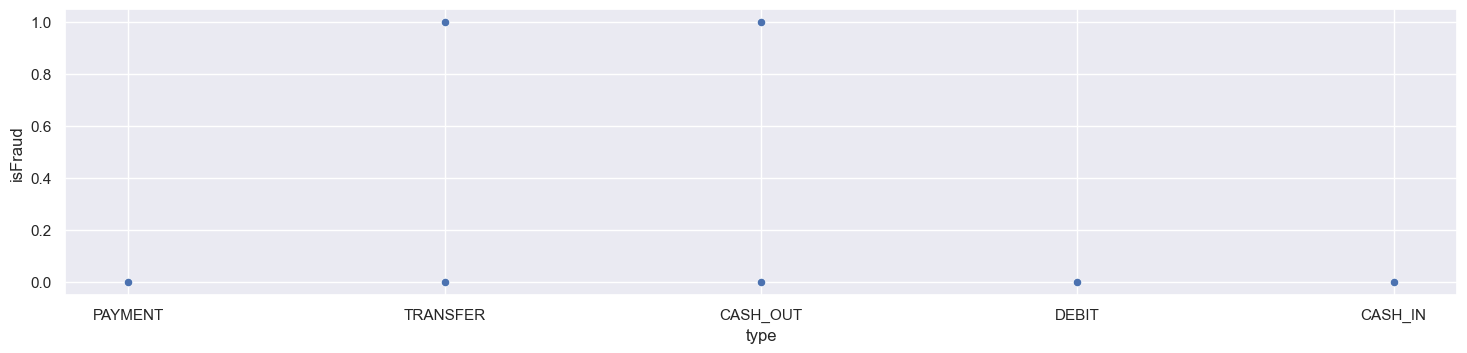

In [20]:
sns.set(rc = {"figure.figsize":(16, 12)})
plt.tight_layout()
for col in range(len(categorical_features)):

    plt.subplot(3, 1, col+1)
    sns.scatterplot(y = data['isFraud'], x = data[categorical_features[col]])

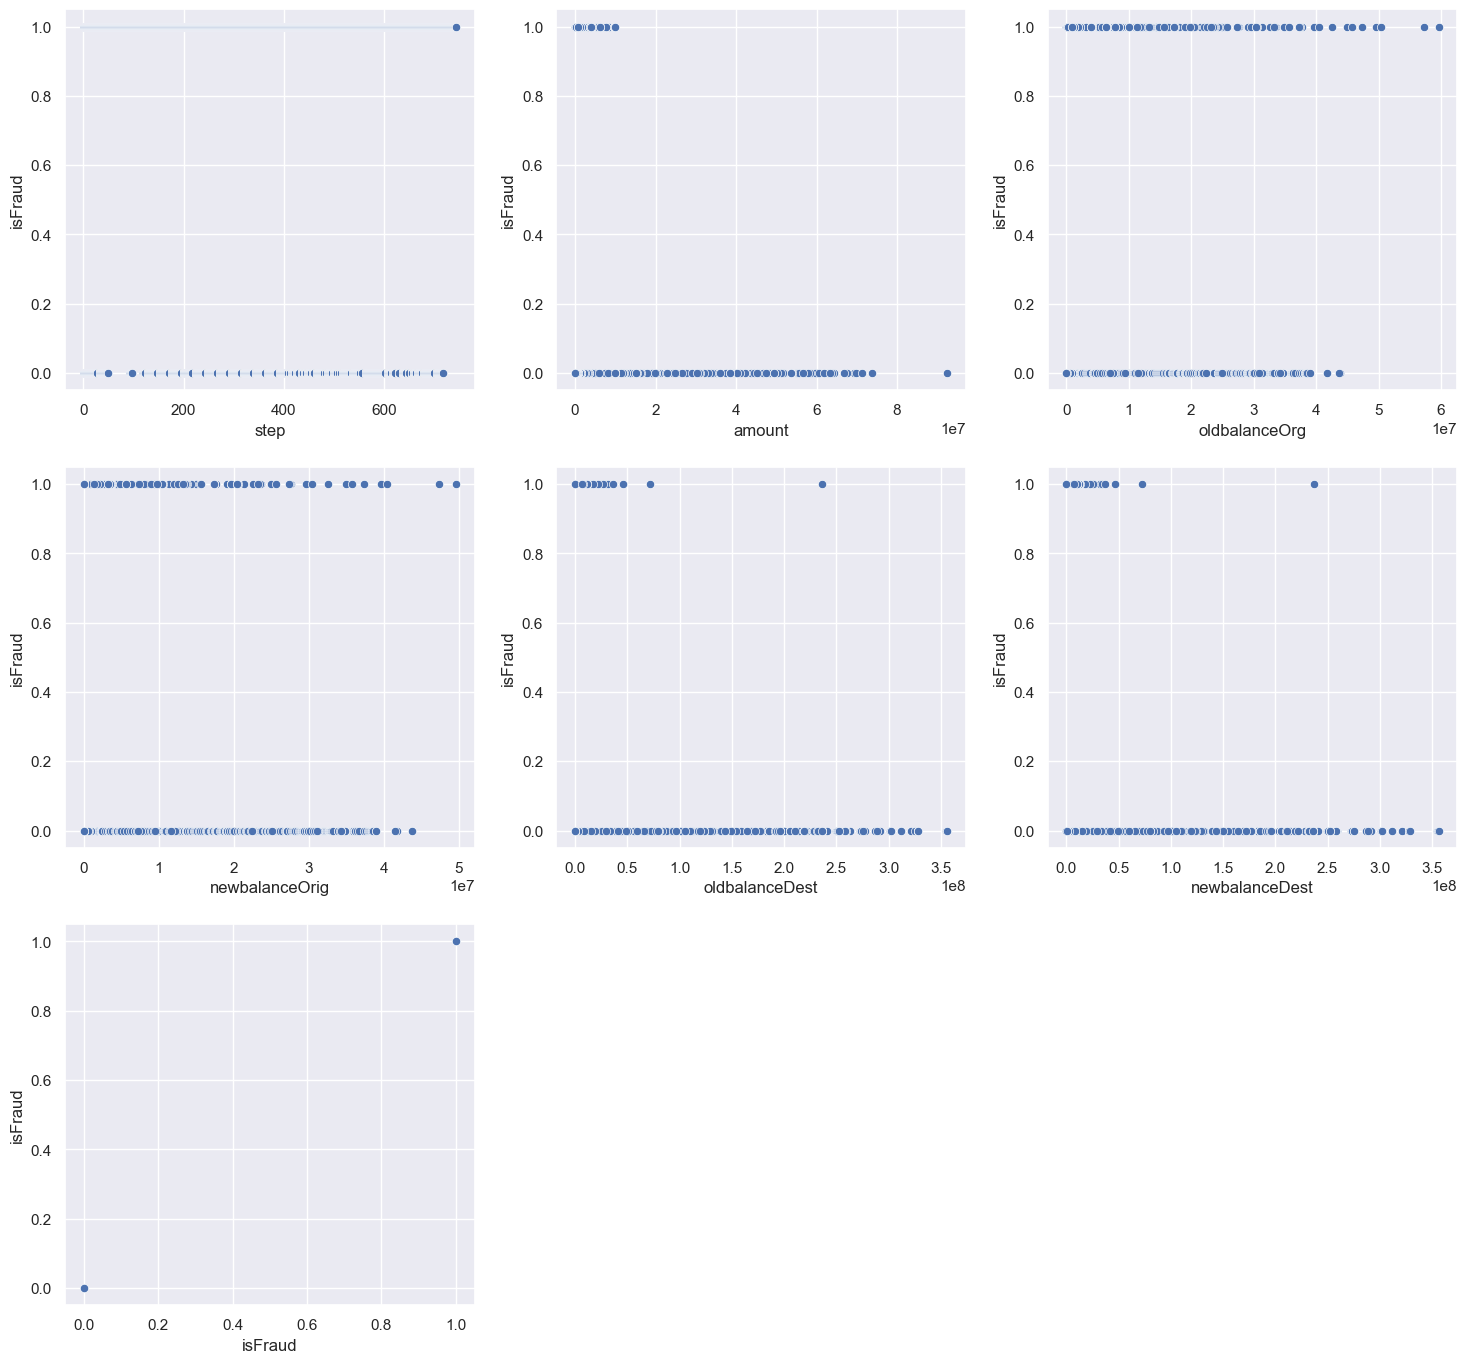

In [32]:
sns.set(rc = {"figure.figsize":(16, 16)})
plt.tight_layout()
for col in range(len(numeric_features)):

    plt.subplot(3,3, col+1)
    sns.scatterplot(y = data['isFraud'], x = data[numeric_features[col]])

# Convert Catogorical data to numeric by encoding it

In [21]:
# one_hot_encoded_data = pd.get_dummies(data, columns = categorical_features, dtype = int)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['type'] = le.fit_transform(data['type'])

<Axes: >

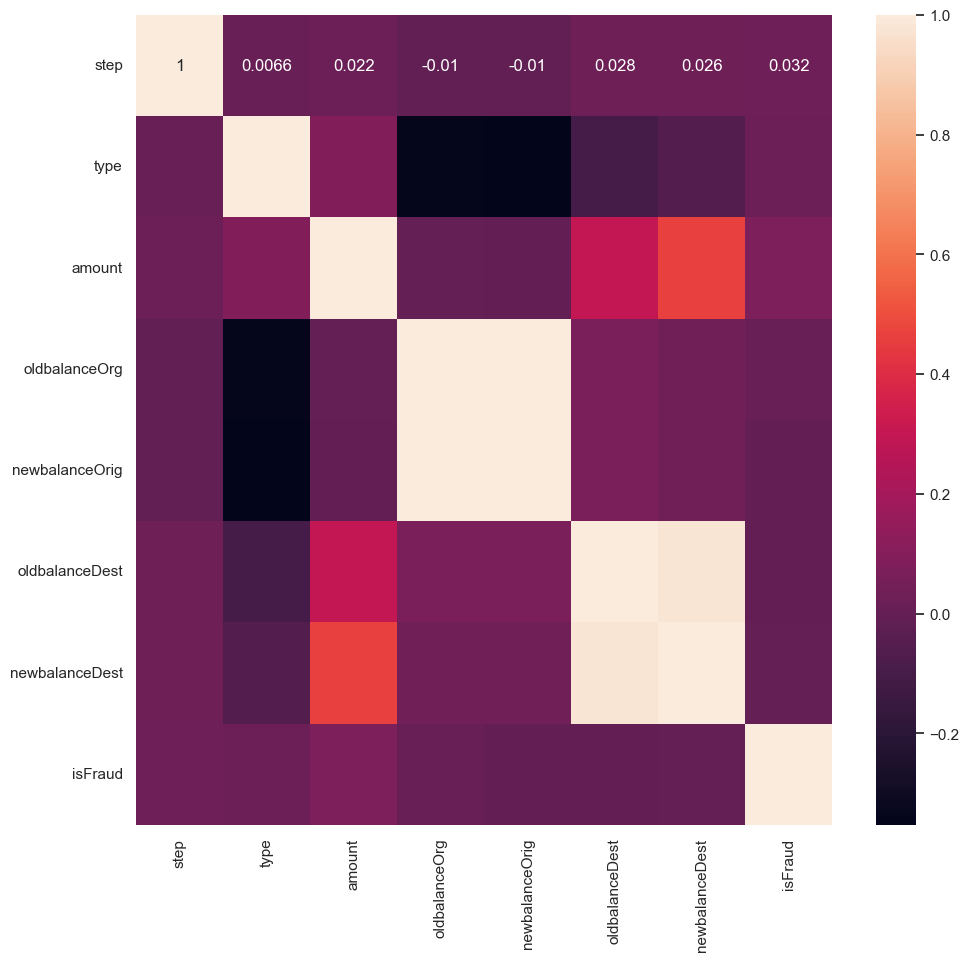

In [22]:
sns.set(rc = {"figure.figsize":(10, 10)})

sns.heatmap(data.corr(), annot = True)

#### we see that the charges is highly correlated with smoker_yes/smoker_no and bmi and slightly with region, almost no correlation with sex

In [23]:
data.drop(columns = ['oldbalanceOrg', 'oldbalanceDest'], inplace = True)

<Axes: >

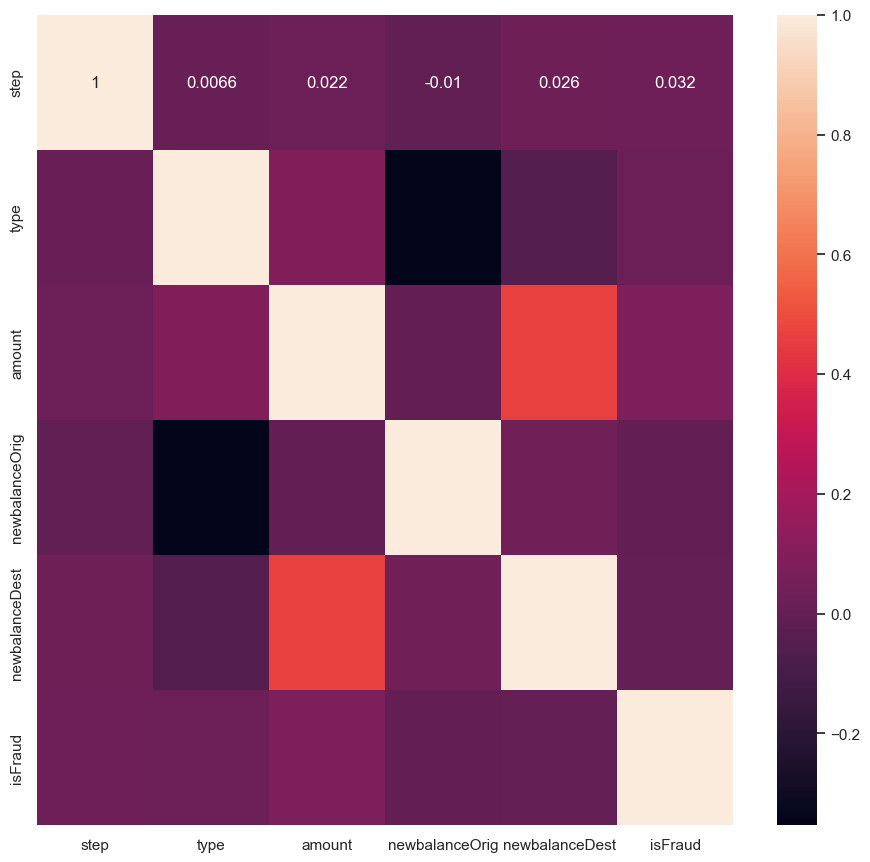

In [24]:
sns.set(rc = {"figure.figsize":(10, 10)})

sns.heatmap(data.corr(), annot = True)

In [25]:
categorical_features = data.select_dtypes(include ='object' ).columns
numeric_features = data.select_dtypes(exclude ='object' ).columns

In [27]:
print(numeric_features)

Index(['step', 'type', 'amount', 'newbalanceOrig', 'newbalanceDest',
       'isFraud'],
      dtype='object')


In [41]:
data.to_csv("./data/cleandata.csv")

# Model training

In [53]:
# Seperate dependent and independant columns

X = data.drop(columns = ["isFraud"])
y = data["isFraud"]

In [42]:
# I have to build using sklearn pipeline

# transformations for numerical data
# transformations for categorical data
# model

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [43]:
numerical_pipeline = Pipeline(
    steps = [ ('impute',SimpleImputer(strategy='median')),
             ('scaler', StandardScaler)
])

categorical_pipeline = Pipeline(
    steps = [('impute',SimpleImputer(strategy='most_frequent'))            ]
)

In [46]:
# Column transform takes (name, transform, features)
preprocessor = ColumnTransformer([('numerical_pipeline', numerical_pipeline, numeric_features)])

In [47]:
# Train_test_split

from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [57]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4262955, 5) (2099665, 5)
(4262955,) (2099665,)


## Evaluation metric

In [61]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [69]:
def performance(test, predict):

    print(classification_report(test, predict))
    print("------------------------------------")

    print("Accuracy ", accuracy_score(test, predict))

    print("------------------------------------")

    print("confusion_matrix ", confusion_matrix(test, predict))

    print("------------------------------------")

    print("F1_score ", f1_score(test, predict))

    print("------------------------------------")

    print("precision_score ", precision_score(test, predict))

    print("------------------------------------")

    print("recall_score ", recall_score(test, predict))

    print("------------------------------------")
    

In [70]:
# Use machine learning algorithms now to get the result 
# Use gridsearchCV for getting the best parameters (hyperparametertuning)